### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

### Loading & Preprocessing Dataset

In [3]:
data = pd.read_csv("penguins.csv")
display(data.head())

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
data.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
data.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

#### Handling Missing Values

In [7]:
data.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
numeric_impute = SimpleImputer(strategy="mean")
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = numeric_impute.fit_transform(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [9]:
categorical_impute = SimpleImputer(strategy='most_frequent')
data[['sex']] = categorical_impute.fit_transform(data[['sex']])

In [10]:
# Handling Missing Values

data.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

#### Dropping Unncessary Values

In [11]:
data = data.drop(columns=['id', 'year'], axis=1)
display(data.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female


### Data Visualization

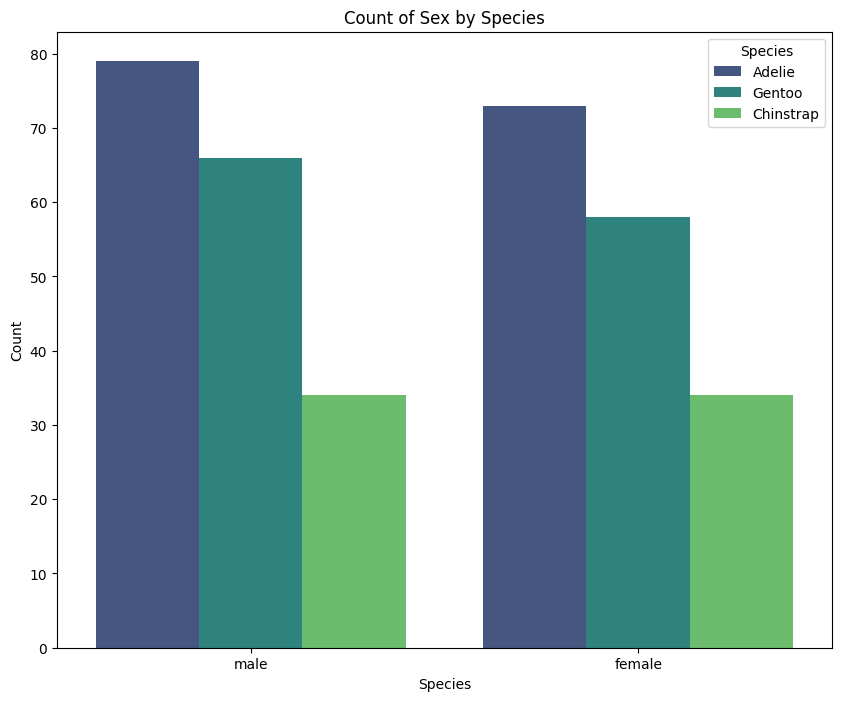

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='sex', hue='species', palette="viridis")
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Sex by Species')
plt.legend(title='Species')
plt.show()

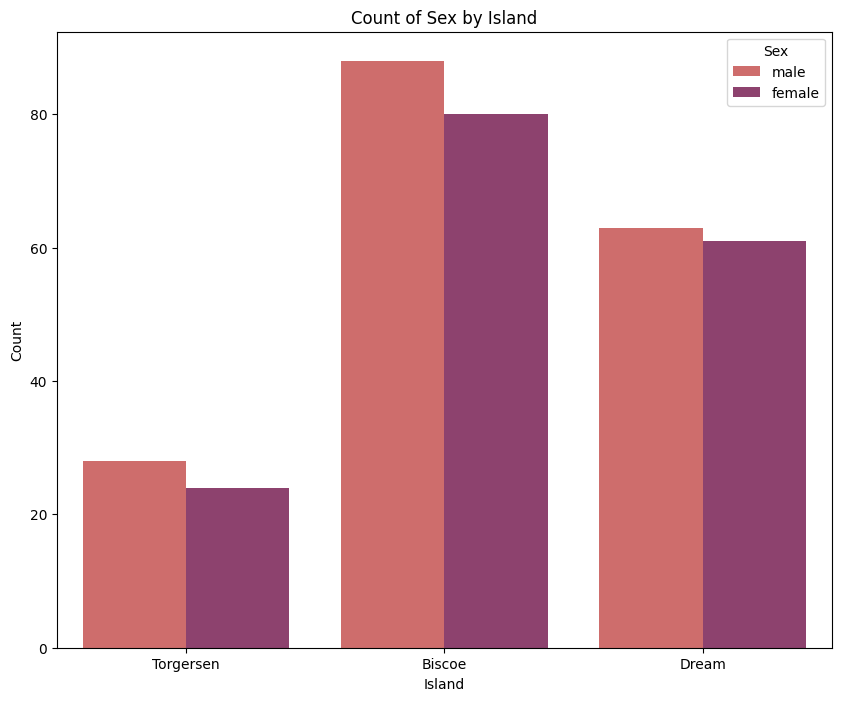

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='island', hue='sex', palette="flare")
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Count of Sex by Island')
plt.legend(title='Sex')
plt.show()

In [14]:
def scatter_plot(data, x, y, hue):
    sns.scatterplot(data,
                    x=x,
                    y=y,
                    hue=hue
                    )
    plt.title(f"({x} x {y} x), hue: {hue}")

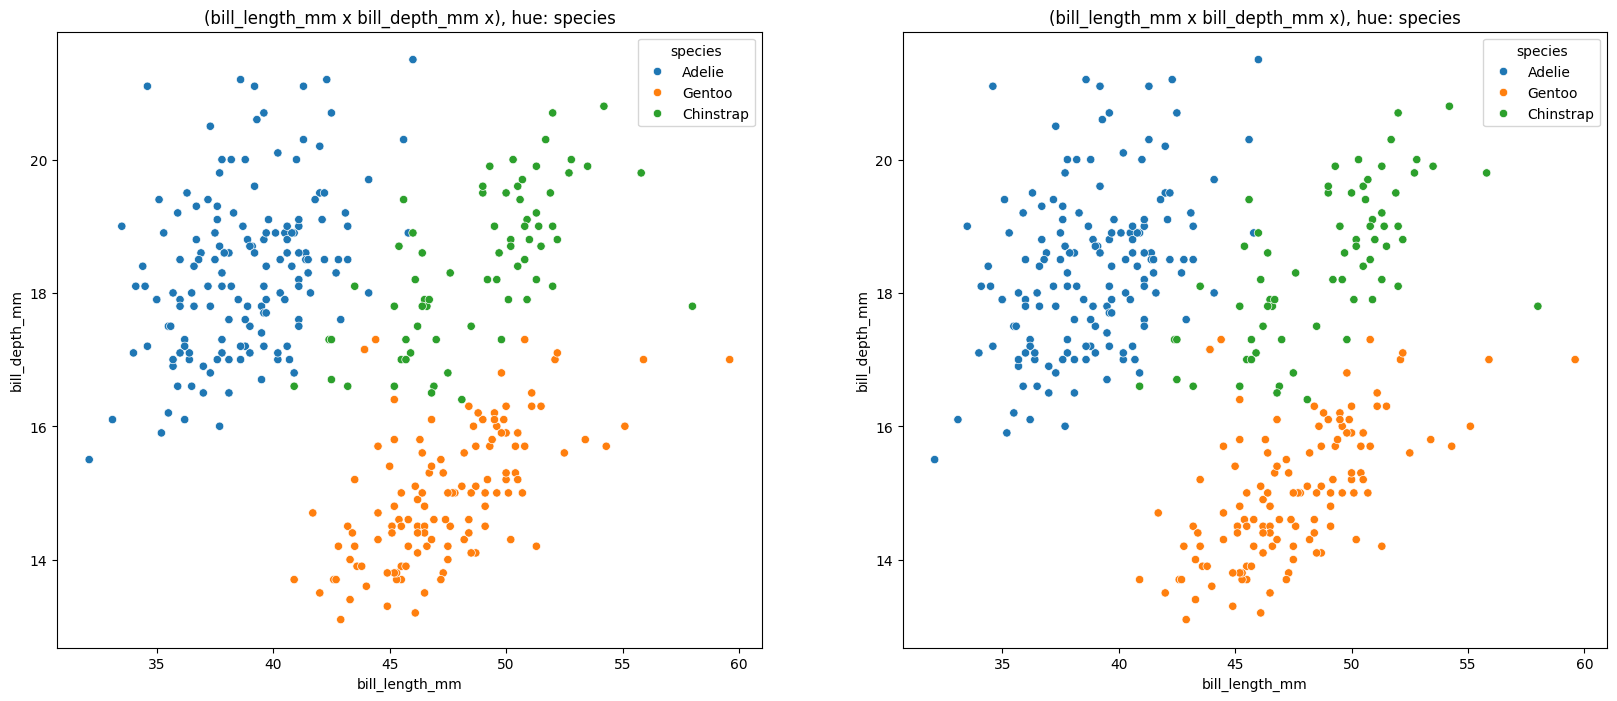

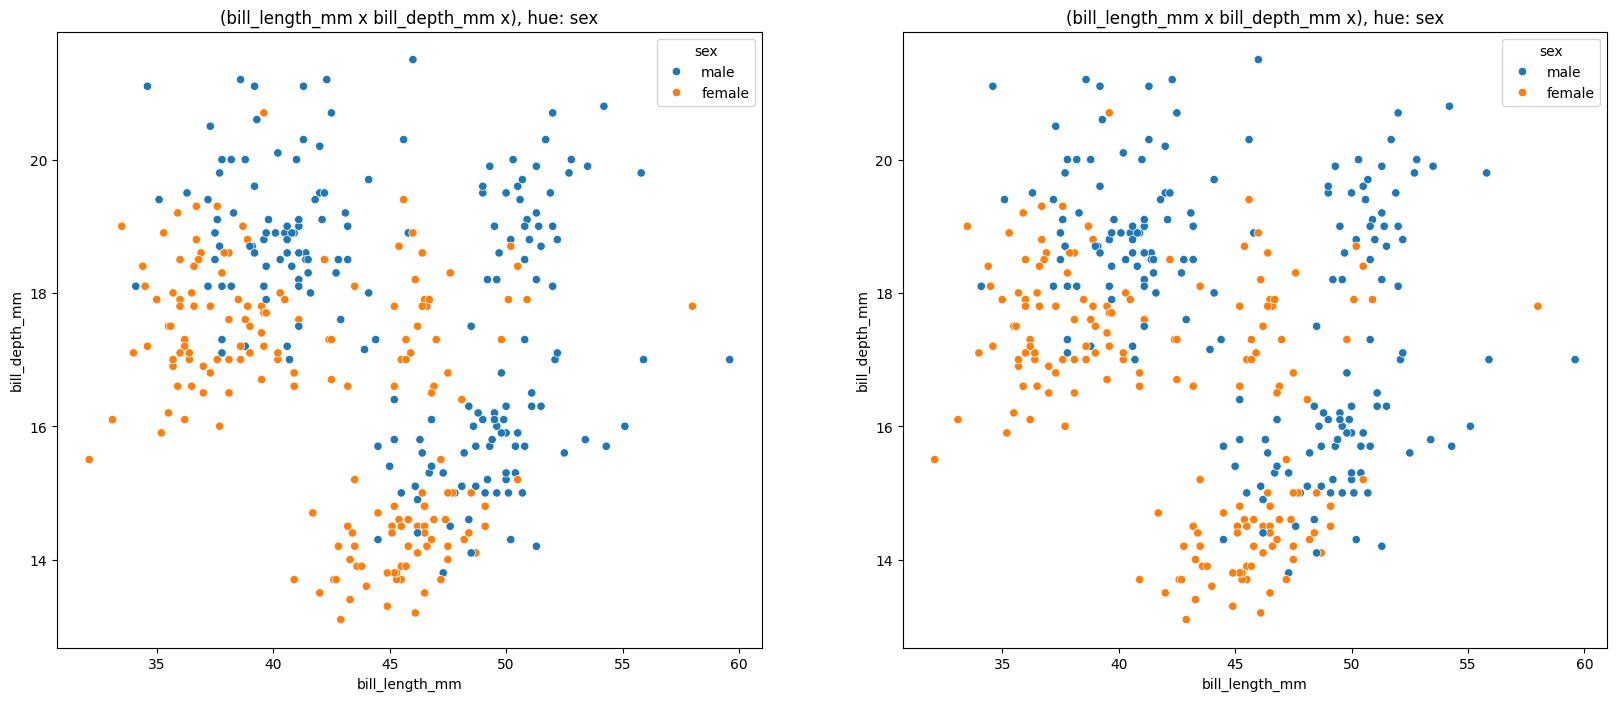

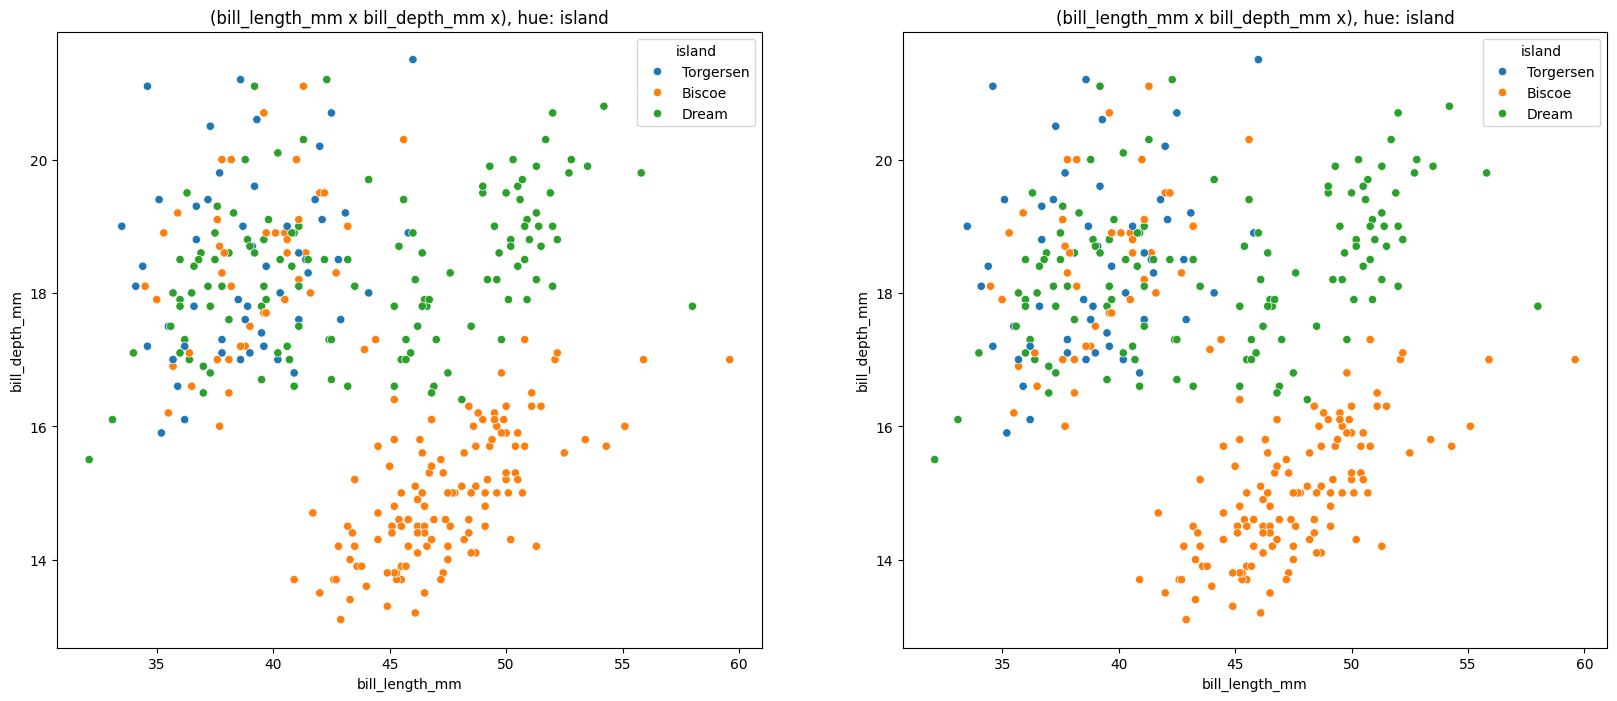

In [15]:
lt = ['species', 'sex', 'island']
for i in lt:
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    scatter_plot(data,'bill_length_mm','bill_depth_mm', i )
    plt.subplot(122)
    scatter_plot(data, 'bill_length_mm','bill_depth_mm', i )
    plt.show()

In [193]:
def box_plot(dataframe, x, y, hue):
    sns.boxplot(dataframe, 
                x=x, 
                y=y, 
                hue=hue)
    plt.title(f"({x} x {y} x), hue: {hue}")

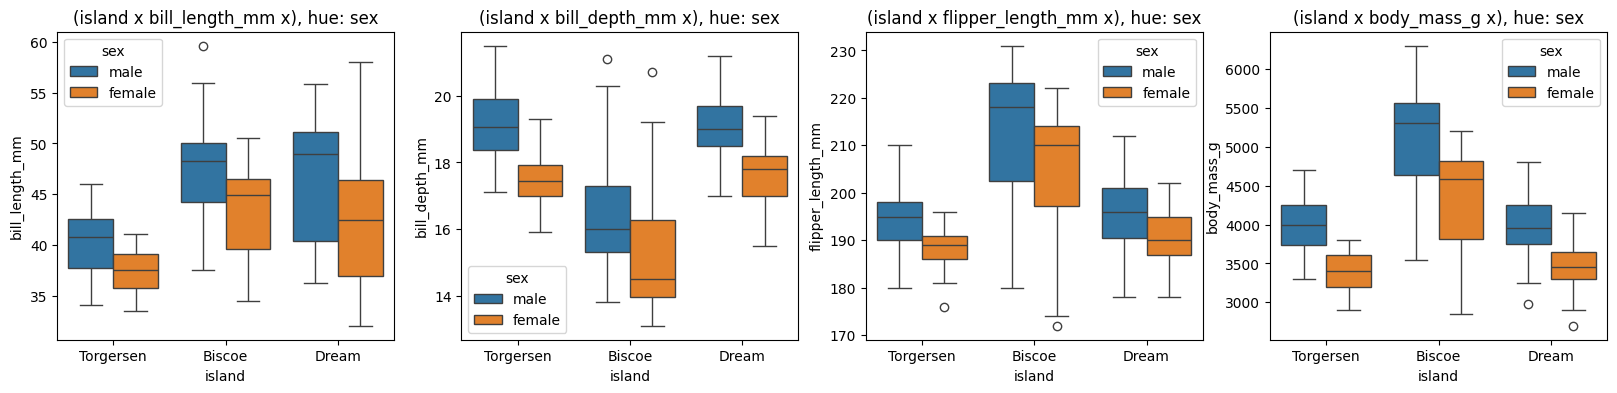

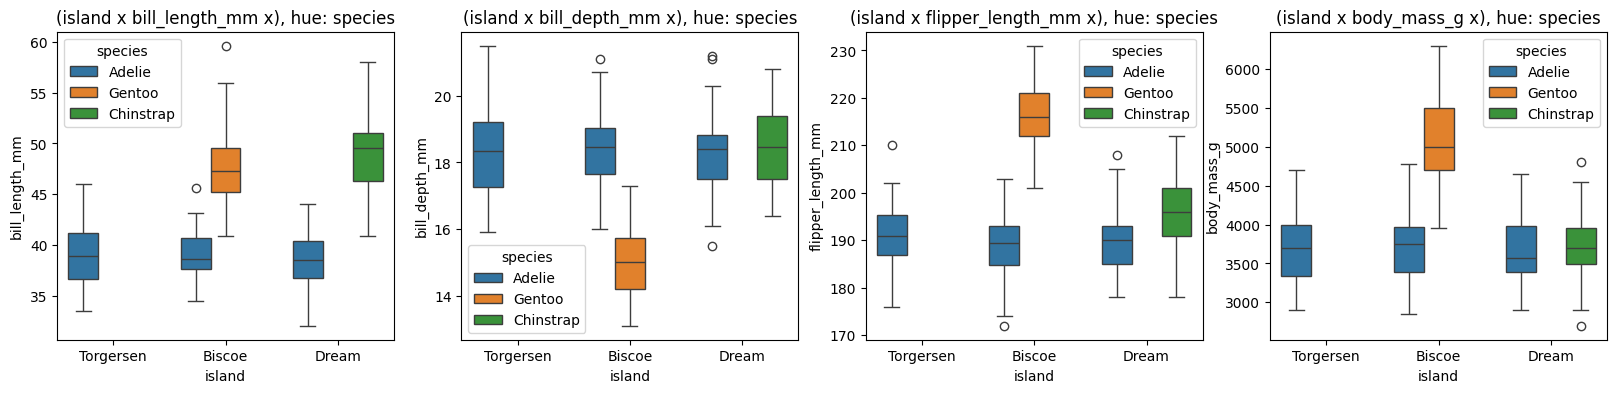

In [194]:
lt2 = ['sex', 'species']

for i in lt2:
    plt.figure(figsize=(20,4))
    plt.subplot(141)
    box_plot(data, 'island', 'bill_length_mm', i)
    plt.subplot(142)
    box_plot(data, 'island', 'bill_depth_mm', i)
    plt.subplot(143)
    box_plot(data, 'island', 'flipper_length_mm', i)
    plt.subplot(144)
    box_plot(data, 'island', 'body_mass_g', i)
    plt.show()

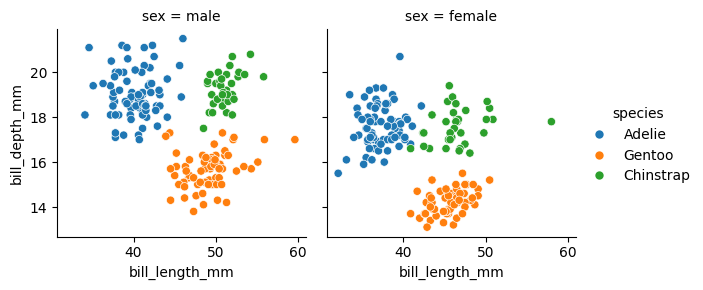

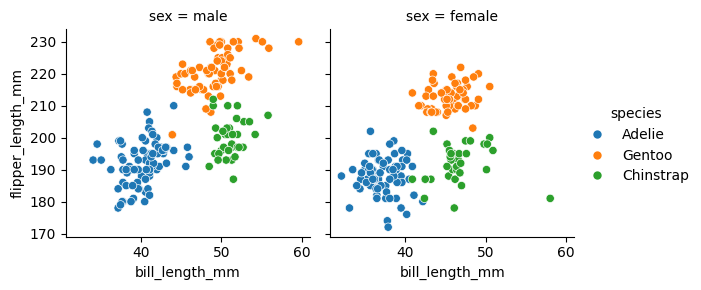

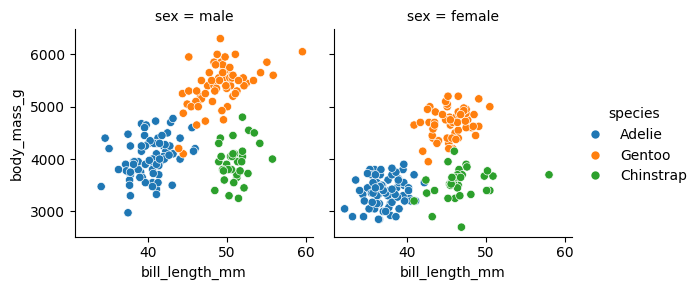

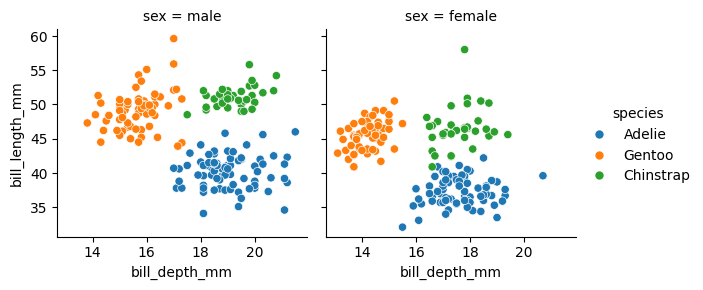

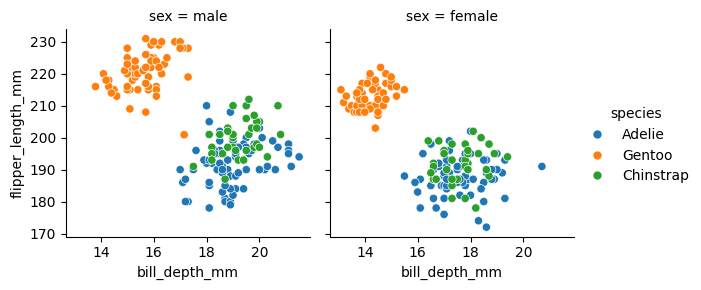

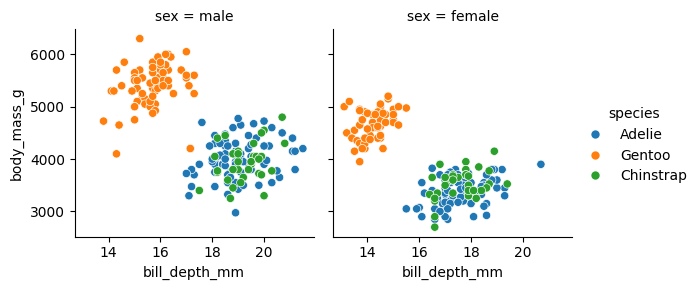

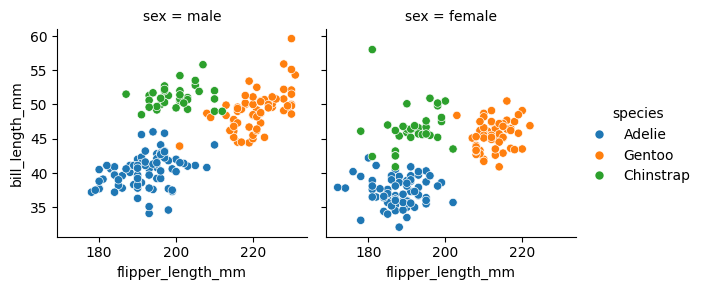

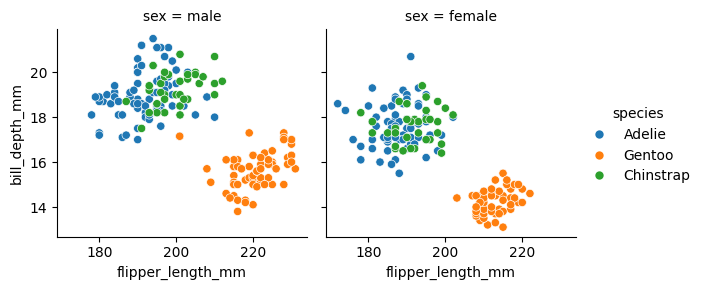

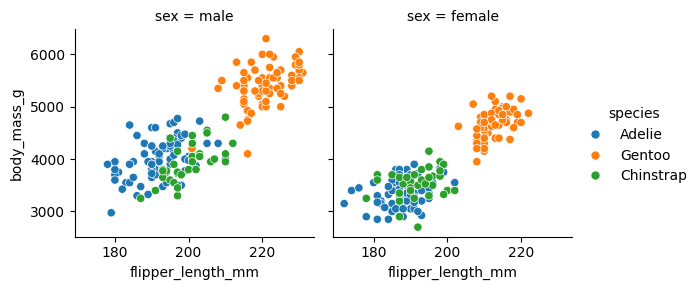

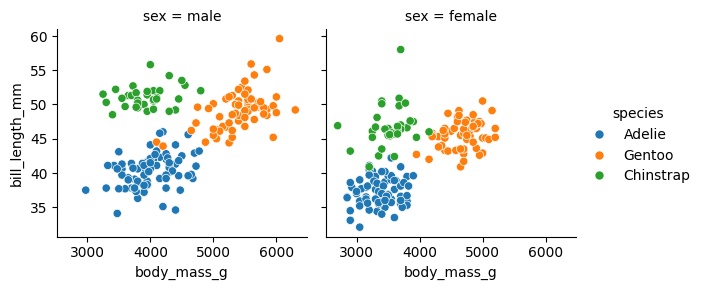

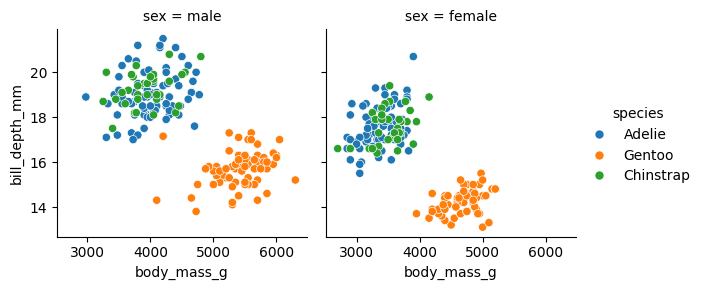

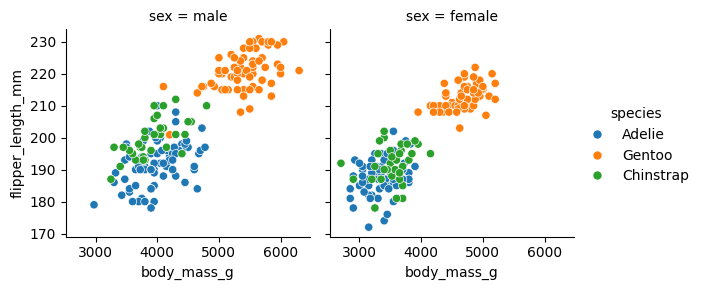

In [195]:
for col1 in data.columns[2:6]:
    for col2 in data.columns[2:6]:
        if col1 != col2:
            sns.relplot(data, x= col1, y= col2, hue='species', col='sex', height= 3)
        else:
            pass

### Label Encoder

In [17]:
le= LabelEncoder()

In [18]:
columns_to_encode = ['sex', 'species', 'island']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [19]:
display(data.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


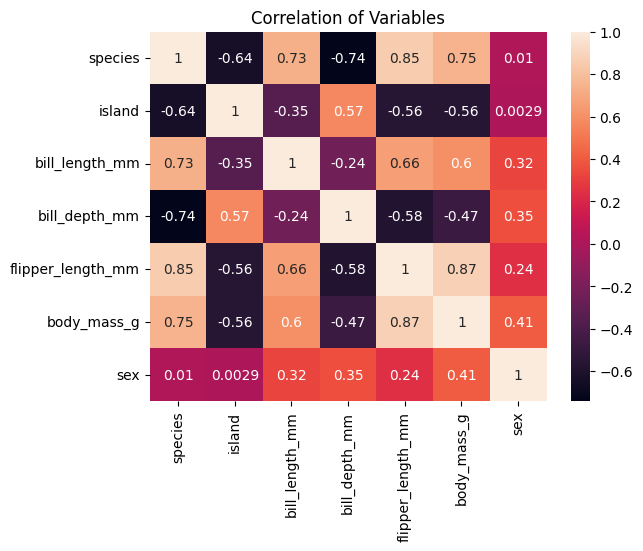

In [20]:
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation of Variables")
plt.show()

# Machine Learning Classifier

### Splitting the Data

In [21]:
X = data.drop(columns=['sex'])
y = data['sex']

In [22]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10000,18.70000,181.000000,3750.000000
1,0,2,39.50000,17.40000,186.000000,3800.000000
2,0,2,40.30000,18.00000,195.000000,3250.000000
3,0,2,43.92193,17.15117,200.915205,4201.754386
4,0,2,36.70000,19.30000,193.000000,3450.000000


In [23]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int32

### Training and Testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling The Data

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(random_state=42)

### Hyperparameter Grid to Search

In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

##### Get the Best Hyperparameters

In [30]:
best_params = grid_search_dtc.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

# Model Traininig

### DecisionTreeClassifier

In [31]:
best_dtc = DecisionTreeClassifier(random_state=42, **best_params)
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [33]:
dtc_y_pred = best_dtc.predict(X_test)
dtc_y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0])

In [34]:
dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
dtc_precision = precision_score(y_test, dtc_y_pred)
dtc_f1_score = f1_score(y_test, dtc_y_pred)
dtc_conf_matrix = confusion_matrix(y_test, dtc_y_pred)

The Accuracy Score of DecisionTreeClassifier is 0.88
The Precison Score of DecisionTreeClassifier is 0.97
The F1 Score of DecisionTreeClassifier is 0.89
The Condusion Matrix of DecisionTreeClassifier is:


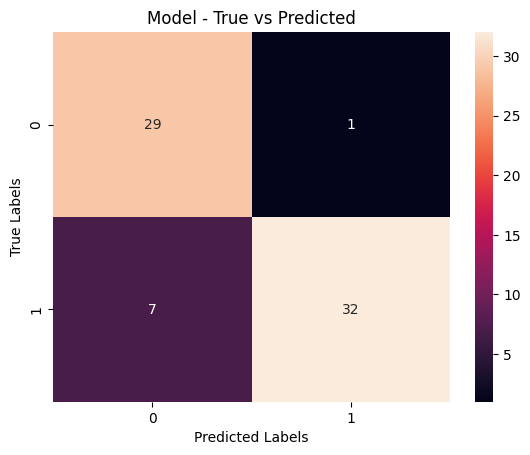

In [35]:
print(f"The Accuracy Score of DecisionTreeClassifier is {dtc_accuracy:.2f}")
print(f"The Precison Score of DecisionTreeClassifier is {dtc_precision:.2f}")
print(f"The F1 Score of DecisionTreeClassifier is {dtc_f1_score:.2f}")
print("The Condusion Matrix of DecisionTreeClassifier is:")
sns.heatmap(dtc_conf_matrix, annot=True)
plt.title('Model - True vs Predicted')
plt.ylabel('True Labels')     
plt.xlabel('Predicted Labels')
plt.show()

## RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=42)

In [37]:
# Cross Validation Score

cv_score = cross_val_score(rf, X, y, cv=5)

In [38]:
print("Cross-Validation Results:")
for i, score in enumerate(cv_score, 1):
    print(f"Fold {i}: {score:.2f}")

Cross-Validation Results:
Fold 1: 0.84
Fold 2: 0.88
Fold 3: 0.87
Fold 4: 0.87
Fold 5: 0.82


In [39]:
# Grid Search

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [40]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [41]:
best_rf = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

In [42]:
rf_y_pred = best_rf.predict(X_test)
rf_y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0])

In [43]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_f1_score = f1_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

The Accuracy Score of RandomForestClassifier is 0.90
The Precison Score of RandomForestClassifier is 0.97
The F1 Score of RandomForestClassifier is 0.90
The Condusion Matrix of RandomForestClassifier is:


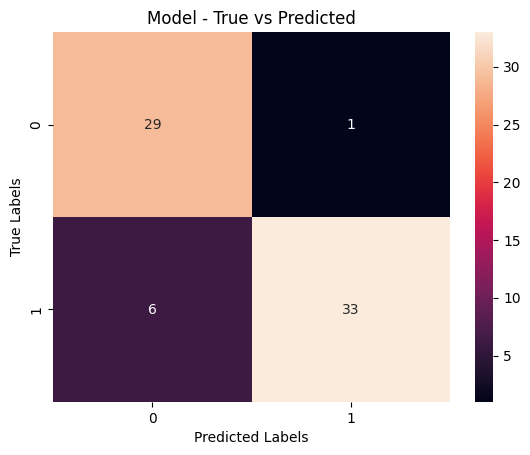

In [223]:
print(f"The Accuracy Score of RandomForestClassifier is {rf_accuracy:.2f}")
print(f"The Precison Score of RandomForestClassifier is {rf_precision:.2f}")
print(f"The F1 Score of RandomForestClassifier is {rf_f1_score:.2f}")
print("The Condusion Matrix of RandomForestClassifier is:")
sns.heatmap(rf_conf_matrix, annot=True)
plt.title('Model - True vs Predicted')
plt.ylabel('True Labels')     
plt.xlabel('Predicted Labels')
plt.show()

## GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(random_state=42)

In [45]:
# Cross Validation Score

cv_score_2 = cross_val_score(gbc, X, y, cv=5)

In [46]:
print("Cross-Validation Results:")
for i, score in enumerate(cv_score_2, 1):
    print(f"Fold {i}: {score:.2f}")

Cross-Validation Results:
Fold 1: 0.83
Fold 2: 0.90
Fold 3: 0.87
Fold 4: 0.87
Fold 5: 0.82


In [47]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
gbc_y_pred = gbc.predict(X_test)
gbc_y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0])

In [49]:
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
gbc_precision = precision_score(y_test, gbc_y_pred)
gbc_f1_score = f1_score(y_test, gbc_y_pred)
gbc_conf_matrix = confusion_matrix(y_test, gbc_y_pred)

The Accuracy Score of GradientBoostingClassifier is 0.91
The Precison Score of GradientBoostingClassifier is 0.97
The F1 Score of GradientBoostingClassifier is 0.92
The Condusion Matrix of GradientBoostingClassifier is:


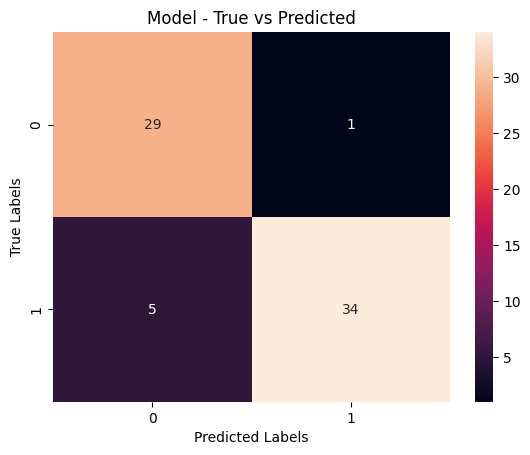

In [50]:
print(f"The Accuracy Score of GradientBoostingClassifier is {gbc_accuracy:.2f}")
print(f"The Precison Score of GradientBoostingClassifier is {gbc_precision:.2f}")
print(f"The F1 Score of GradientBoostingClassifier is {gbc_f1_score:.2f}")
print("The Condusion Matrix of GradientBoostingClassifier is:")
sns.heatmap(gbc_conf_matrix, annot=True)
plt.title('Model - True vs Predicted')
plt.ylabel('True Labels')     
plt.xlabel('Predicted Labels')
plt.show()

### Comaprision of Accuracy, Precision, F1-Score

In [51]:
models_accuracies = {
    'Models': ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Accuracy': [0.88, 0.90, 0.91],
    'Precision': [0.97, 0.97, 0.97],
    'F1_Score': [0.89, 0.90, 0.92]
}

accuracy_df = pd.DataFrame(models_accuracies)

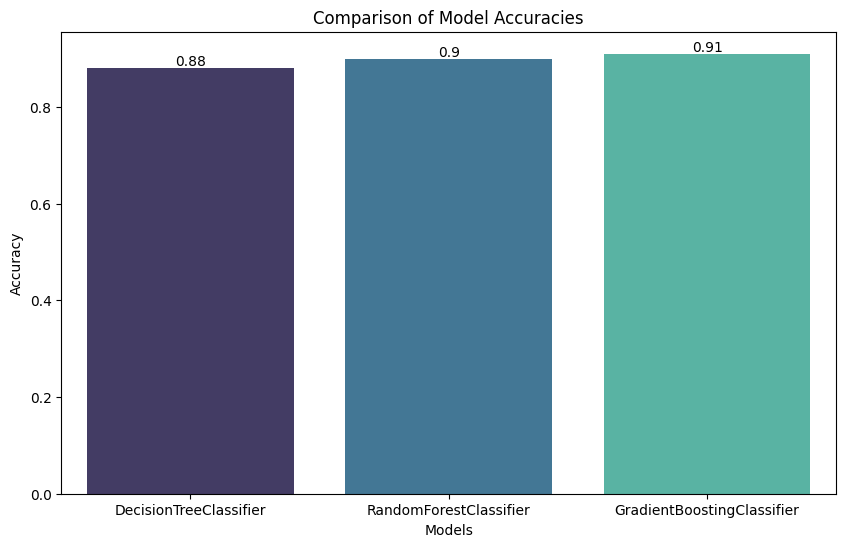

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='Accuracy', data=models_accuracies, palette='mako')

for i in range(len(accuracy_df)):
    plt.text(i, accuracy_df['Accuracy'][i] + 0.005, round(accuracy_df['Accuracy'][i], 3), ha='center')

plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

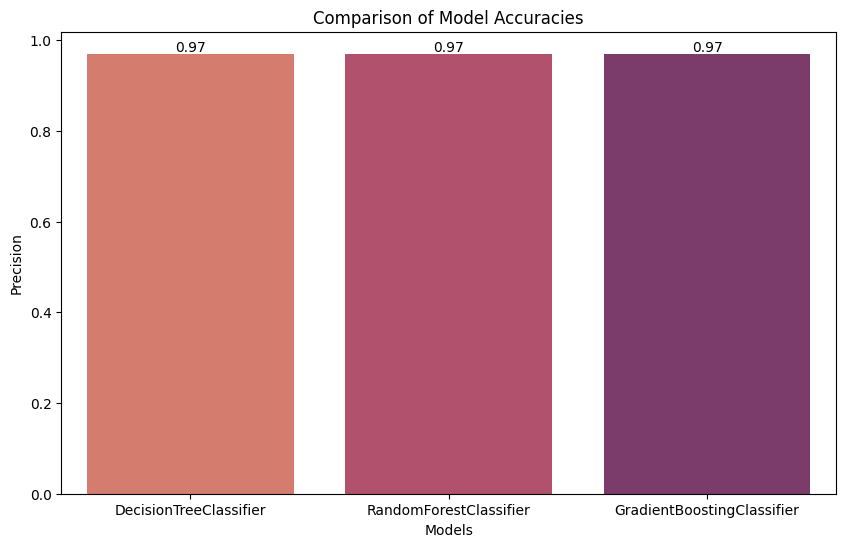

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='Precision', data=models_accuracies, palette='flare')

for i in range(len(accuracy_df)):
    plt.text(i, accuracy_df['Precision'][i] + 0.005, round(accuracy_df['Precision'][i], 3), ha='center')

plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

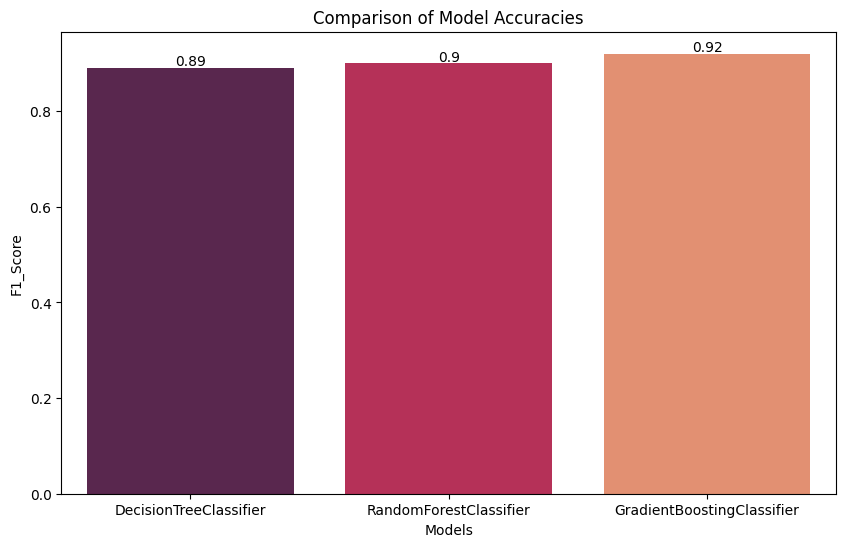

In [235]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='F1_Score', data=models_accuracies, palette='rocket')

for i in range(len(accuracy_df)):
    plt.text(i, accuracy_df['F1_Score'][i] + 0.005, round(accuracy_df['F1_Score'][i], 3), ha='center')

plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('F1_Score')
plt.show()

All the functions perform exceptionally well, achieving an accuracy rate of over 85%. However, among all the models, Gradient Boosting stands out with the best performance.

